In [58]:
from clickhouse_driver import Client
client = Client('oleg.orbita.work', port = 9000, user="student_ml",
password="CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa", settings={'use_numpy':
True})
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


### Загрузите данные из таблицы game_sales, которая находится в базе students_datas.

In [59]:
data = client.execute("select distinct * from students_datas.game_sales")
client.disconnect()

In [60]:
df = pd.DataFrame(data, columns = [
    'Game',
    'Platform',
    'Year',
    'Genre',
    'Publisher',
    'NA_Sales',
    'EU_Sales',
    'JP_Sales',
    'Other_sales',
    'Global_sales'
])
df[:3]

,Game,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_sales,Global_sales
0,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
2,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31


###  Проанализируйте полученные графики и сделайте выводы. Игры каких жанров были наиболее популярны до 2000 года, а какие после? Оцените популярность жанров по количеству выпущенных игр и по объему продаж по всему миру. Для визуализации полученных результатов используйте столбиковые диаграммы. Замечание. Одна и та же игра может встречаться в выборке несколько раз, т.к. она может быть выпущена на нескольких платформах.

In [61]:
best_genres_sales_before_2000 = df[df["Year"] < 2000].drop_duplicates(subset=["Game"]).groupby("Genre").agg(
        Count_of_Games=("Game", "count"),
        Global_Sales=("Global_sales", "sum"),
    ).sort_values("Global_Sales", ascending=False)
best_genres_sales_before_2000

,Count_of_Games,Global_Sales
Genre,,
Platform,145,273.410002
Role-Playing,172,190.140001
Action,210,158.170001
Racing,182,155.829999
Sports,302,150.429999
Shooter,155,121.590000
Fighting,166,108.020000
Puzzle,79,85.200000
Misc,116,64.860000


In [62]:
best_genres_sales_after_2000 = df[df["Year"] >= 2000].drop_duplicates(subset=["Game"]).groupby("Genre").agg(
        Count_of_Games=("Game", "count"),
        Global_Sales=("Global_sales", "sum"),
    ).sort_values("Global_Sales", ascending=False)
best_genres_sales_after_2000

,Count_of_Games,Global_Sales
Genre,,
Action,1701,621.119999
Sports,1072,541.999996
Role-Playing,1049,541.360001
Misc,1207,504.780000
Platform,447,375.450001
Racing,588,333.279999
Shooter,660,299.050001
Simulation,636,275.250001
Fighting,443,199.380000


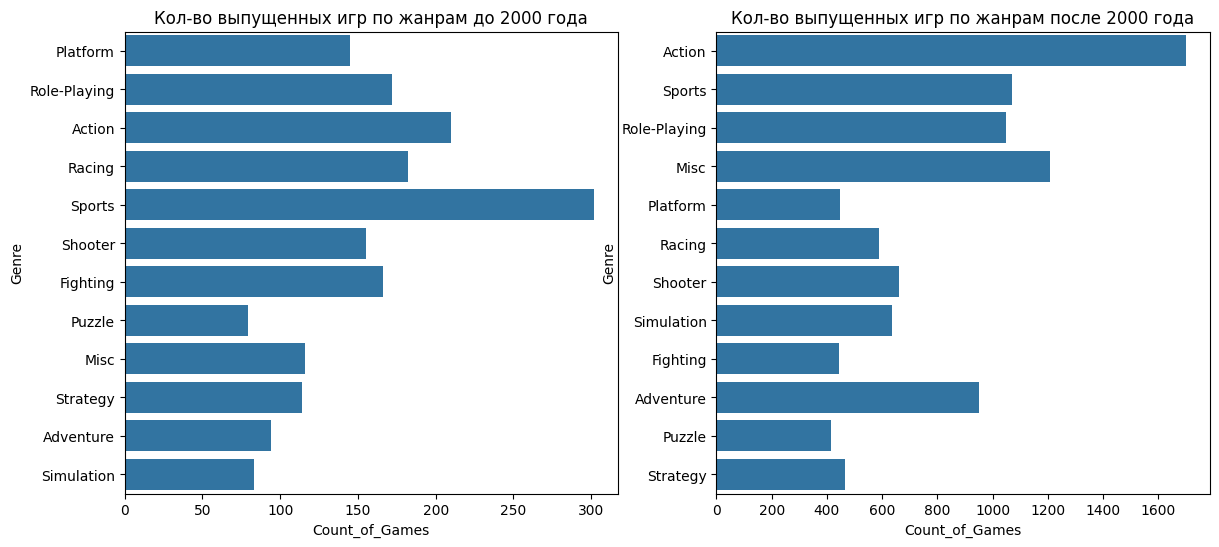

In [63]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sb.barplot(x='Count_of_Games', y='Genre', data=best_genres_sales_before_2000)
plt.title('Кол-во выпущенных игр по жанрам до 2000 года')

plt.subplot(1, 2, 2)
sb.barplot(x='Count_of_Games', y='Genre', data=best_genres_sales_after_2000)
plt.title('Кол-во выпущенных игр по жанрам после 2000 года')

plt.show()

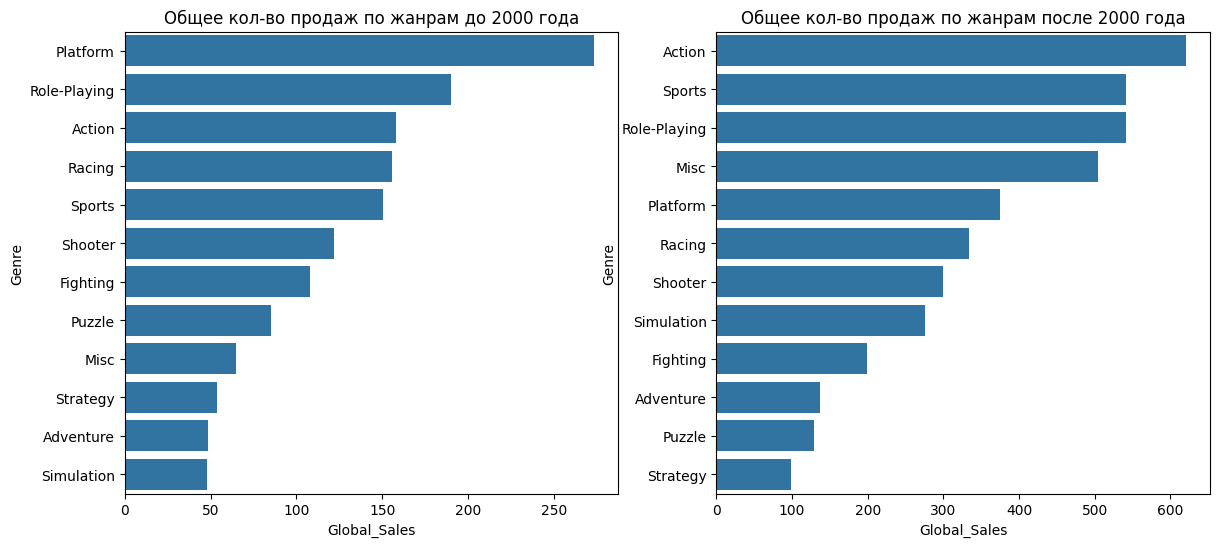

In [64]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sb.barplot(x='Global_Sales', y='Genre', data=best_genres_sales_before_2000)
plt.title('Общее кол-во продаж по жанрам до 2000 года')

plt.subplot(1, 2, 2)
sb.barplot(x='Global_Sales', y='Genre', data=best_genres_sales_after_2000)
plt.title('Общее кол-во продаж по жанрам после 2000 года')

plt.show()

По диаграммам видно, что до 2000 года, что кол-во выпущенных игр определенного жанра и самые продаваемые жанры не совпадают.
Больше всего делали игры по такому жанру - Sport, Fighting, Action. А самые продаваемые это - Platform, Role-Playing, Action.

В случае после 2000 мы видим обратную ситуацию - продаваемые жанры и кол-во выпущенных игр по жанру совпадают. А именно : Action, Sports, Misc, Role-Playing.

###  Отобразите на графике общее число видеоигр, выпущенных в каждом году.

In [65]:
year_count_of_games = df.groupby("Year").size().reset_index(name="Count_of_games")
year_count_of_games[:3]

,Year,Count_of_games
0,1980.0,9
1,1981.0,46
2,1982.0,36


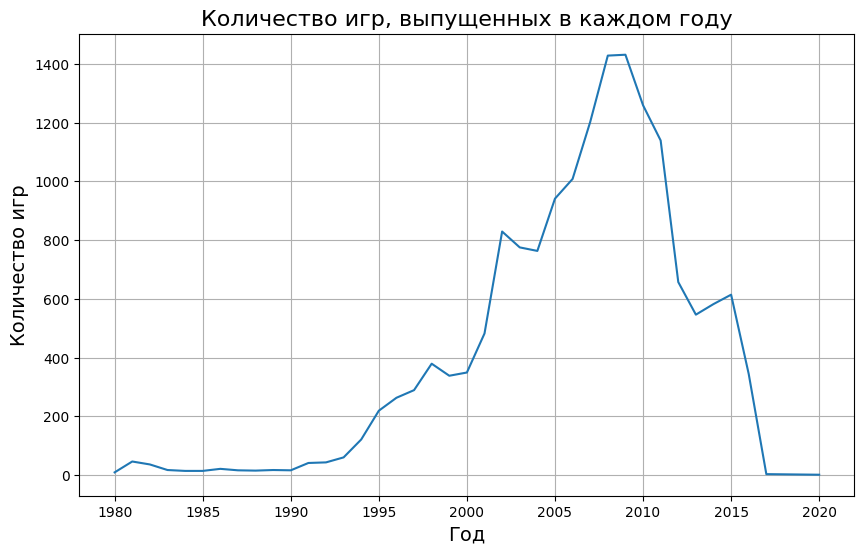

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(year_count_of_games['Year'], year_count_of_games['Count_of_games'])
plt.title('Количество игр, выпущенных в каждом году', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.grid(linestyle="solid")
plt.show()

В целом результат ожидаемый, так как в период конца нулевых вышло много легендарных игр. Такие как GTA 4, STALKER, Assassins Creed. 

### Определите трех издателей, выпустивших наибольшее количество видеоигр.Изобразите количество выпущенных издателями видеоигр для каждой платформы на столбиковой диаграмме (можно использовать диаграмму с накоплением).

In [67]:
top_publishers = df.groupby("Publisher").size().reset_index(name="Count_of_games").sort_values("Count_of_games", ascending=False)[:3]
top_publishers

,Publisher,Count_of_games
138,Electronic Arts,1351
21,Activision,975
347,Namco Bandai Games,932


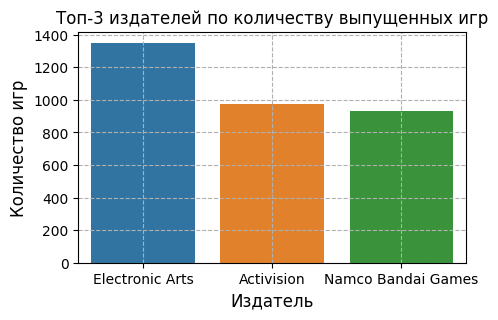

In [68]:
plt.figure(figsize=(5, 3))
sb.barplot(x='Publisher', y='Count_of_games', data=top_publishers, hue="Publisher", legend=False)
plt.title('Топ-3 издателей по количеству выпущенных игр', fontsize=12)
plt.xlabel('Издатель', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.grid(linestyle='dashed')
plt.show()

### Отобразите на круговых диаграммах доли суммарного объема продаж с 1980г. до 2000г. и с 2000г. до 2020г. в Северной Америке, Европе, Японии от объема продаж по всему миру

In [69]:
between_1980_and_2000 = df[(df["Year"] >= 1980) & (df["Year"] < 2000)]
between_2000_and_2020 = df[(df["Year"] >= 2000) & (df["Year"] <= 2020)]

In [70]:
sales_in_NA_by_1980_2000 = between_1980_and_2000["NA_Sales"].sum()
sales_in_EU_by_1980_2000 = between_1980_and_2000["EU_Sales"].sum()
sales_in_JP_by_1980_2000 = between_1980_and_2000["JP_Sales"].sum()
sales_global_by_1980_2000 = between_1980_and_2000["Global_sales"].sum()
sales_in_other_by_1980_2000 = sales_global_by_1980_2000 - (sales_in_NA_by_1980_2000 + sales_in_EU_by_1980_2000 + sales_in_JP_by_1980_2000)
df_1980_2000 = pd.DataFrame({
    'Регионы': ['NA', 'EU', 'JP', 'Other'],
    'Доли': [
        sales_in_NA_by_1980_2000 / sales_global_by_1980_2000 * 100,
        sales_in_EU_by_1980_2000 / sales_global_by_1980_2000 * 100,
        sales_in_JP_by_1980_2000 / sales_global_by_1980_2000 * 100,
        sales_in_other_by_1980_2000 / sales_global_by_1980_2000 * 100,
    ],
    'Продажи': [
        sales_in_NA_by_1980_2000, 
        sales_in_EU_by_1980_2000, 
        sales_in_JP_by_1980_2000, 
        sales_in_other_by_1980_2000
    ]
})
df_1980_2000

,Регионы,Доли,Продажи
0,NA,49.035029,811.770001
1,EU,18.971422,314.070000
2,JP,28.681538,474.819999
3,Other,3.312011,54.830006


In [71]:
sales_in_NA_by_2000_2020 = between_2000_and_2020["NA_Sales"].sum()
sales_in_EU_by_2000_2020 = between_2000_and_2020["EU_Sales"].sum()
sales_in_JP_by_2000_2020 = between_2000_and_2020["JP_Sales"].sum()
sales_global_by_2000_2020 = between_2000_and_2020["Global_sales"].sum()
sales_in_other_by_2000_2020 = sales_global_by_2000_2020 - (sales_in_NA_by_2000_2020 + sales_in_EU_by_2000_2020 + sales_in_JP_by_2000_2020)
df_2000_2020 = pd.DataFrame({
    'Регионы': ['NA', 'EU', 'JP', 'Other'],
    'Доли': [
        sales_in_NA_by_2000_2020 / sales_global_by_2000_2020 * 100,
        sales_in_EU_by_2000_2020 / sales_global_by_2000_2020 * 100,
        sales_in_JP_by_2000_2020 / sales_global_by_2000_2020 * 100,
        sales_in_other_by_2000_2020 / sales_global_by_2000_2020 * 100,
    ],
    'Продажи': [
        sales_in_NA_by_2000_2020, 
        sales_in_EU_by_2000_2020, 
        sales_in_JP_by_2000_2020, 
        sales_in_other_by_2000_2020
    ]
})
df_2000_2020


,Регионы,Доли,Продажи
0,NA,49.151764,3521.660002
1,EU,29.240586,2095.049998
2,JP,11.297902,809.479999
3,Other,10.309747,738.679992


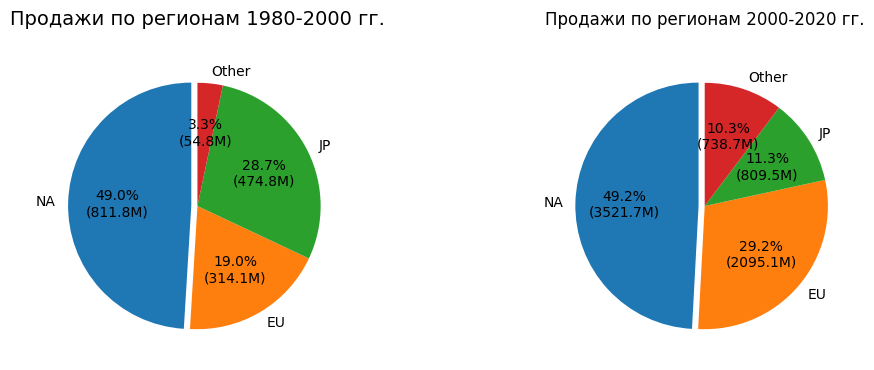

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.pie(
    df_1980_2000['Доли'],
    labels=df_1980_2000['Регионы'],
    autopct=lambda p: f'{p:.1f}%\n({p*df_1980_2000["Продажи"].sum()/100:.1f}M)',
    startangle=90,
    explode=(0.05, 0, 0, 0),
    textprops={'fontsize': 10}
)
ax1.set_title('Продажи по регионам 1980-2000 гг.', pad=20, fontsize=14)

ax2.pie(
    df_2000_2020['Доли'],
    labels=df_2000_2020['Регионы'],
    autopct=lambda p: f'{p:.1f}%\n({p*df_2000_2020["Продажи"].sum()/100:.1f}M)',
    startangle=90,
    explode=(0.05, 0, 0, 0),
    textprops={'fontsize': 10}
)
ax2.set_title('Продажи по регионам 2000-2020 гг.', pad=20, fontsize=12)

plt.show()